In [ ]:
# Download the Fish Market dataset from OA 4.11. 
#
# Use all the attributes except for species to predict the weight of the fish. 
# Report the coefficients returned by lasso and ridge models. 

In [5]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import statsmodels.api as sm

# Load and print dataset to ensure data is clean, numeric, and I know what columns are available
df = pd.read_csv("../Datasets/Code_and_Data_(Chapter_04)/Code and Data (Chapter 04)/fish.csv")
print(df)

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


In [15]:
# Create feature set and target variable
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
X = sm.add_constant(X)
y = df.Weight

# Create regular linear regression, ridge linear regression, and lasso linear regression models
# Note: I decreased the alpha and increased max iterations because of warnings related to the lasso model
regr_linear = linear_model.LinearRegression()
regr_Lasso = linear_model.Lasso(alpha=0.01, max_iter=10000)
regr_Ridge = linear_model.Ridge(alpha=0.1)

regr_linear.fit(X, y)
regr_Lasso.fit(X, y)
regr_Ridge.fit(X, y)

# Report the coefficients returned by each model
feature_names = ['Constant', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
linear_coef = regr_linear.coef_
lasso_coef = regr_Lasso.coef_
ridge_coef = regr_Ridge.coef_

coef_df = pd.DataFrame({
    'Linear Regression': linear_coef,
    'Lasso Regression': lasso_coef,
    'Ridge Regression': ridge_coef
}, index=feature_names)

print(coef_df)

# Based on the coefficient matrix produced from the coefficients of all three regression models, the following
# conclusions can be drawn:
#
# - All models report constants within a very close margin of one another
# - Ridge and Lasso effects on coefficients:
#    - Ridge regression has slightly smaller coefficients than lasso and linear, due to the L2 penalty term.
#    - Lasso regression coefficients are observed to be smaller for some and larger for other variables
#    - A graph displaying the effect of L1 (lasso) and L2 (ridge) penalty terms on linear regression coefficients
#      is included below.
# - Length2 and Length3 both have a negative correlation with the dependent variable
# - Length1, Height, and Width show a positive correlation with the dependent variable

          Linear Regression  Lasso Regression  Ridge Regression
Constant           0.000000          0.000000          0.000000
Length1           62.355214         62.365339         61.616840
Length2           -6.526752         -6.518736         -5.874790
Length3          -29.026219        -29.040173        -28.978285
Height            28.297351         28.306310         28.237645
Width             22.473307         22.439569         22.474607


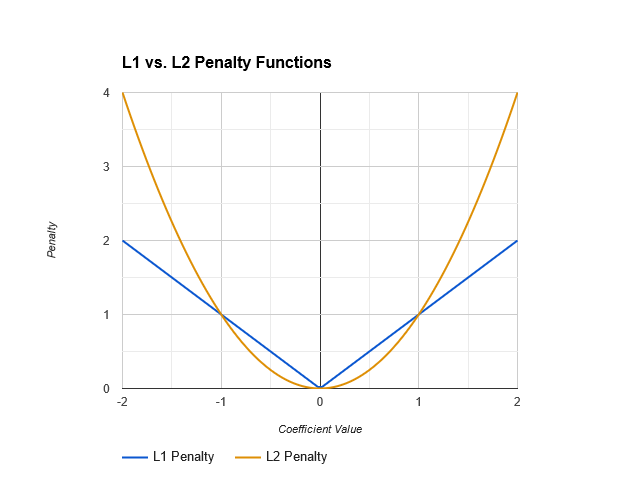